In [1]:
from sklearn import datasets, neighbors, metrics, grid_search, cross_validation
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)

## Build your own Classifier 

1. Plot the flowers below and then find natural cut points. Where could you divide your plot to create a classifier?

AxesSubplot(0.125,0.125;0.775x0.755)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


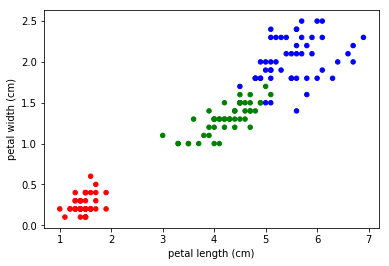

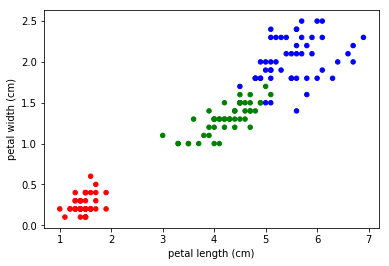

In [3]:
#plotting
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()


2 Using those cutpoints create a function to classify the flowers

In [4]:
def my_classifier(row):
    
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1


In [5]:
predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.666666666667


### Starter Code

Work on improving the classifier below.


In [6]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    elif row['petal length (cm)'] < 5:
        return 1
    else:
        return 2



In [7]:
predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.946666666667


## Using distance: KNN implementation

 n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.

In [8]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
#this prints our predicted values
print knn.predict(iris.data[:,2:])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
#print the real values (flower types)
# info on target: http://scikit-learn.org/stable/datasets/index.html
print iris.target


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
#accuracy (replace x and y with real data)
print knn.score(iris.data[:,2:], iris.target)

0.98


### Question: Do we see a change in performance when using the distance weight?

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights= "distance") # add in the weights parameter here


In [15]:
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333


The accuracy did improve overall.

### Solution to solving K (with cross-validation and grid-search)

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [22]:
# some n_list! keep in mind cross validation
k = range(1,75)
params = {'n_neighbors': k }

kf = cross_validation.KFold(len(irisdf), n_folds = 10)

In [23]:
# recall: what's an effective way to create a numerical list in python?

gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)
gs.grid_scores_


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.93333, std: 0.07888, params: {'n_neighbors': 2},
 mean: 0.94667, std: 0.06532, params: {'n_neighbors': 3},
 mean: 0.92667, std: 0.08667, params: {'n_neighbors': 4},
 mean: 0.93333, std: 0.08433, params: {'n_neighbors': 5},
 mean: 0.92667, std: 0.08667, params: {'n_neighbors': 6},
 mean: 0.93333, std: 0.07888, params: {'n_neighbors': 7},
 mean: 0.94000, std: 0.08138, params: {'n_neighbors': 8},
 mean: 0.93333, std: 0.08433, params: {'n_neighbors': 9},
 mean: 0.93333, std: 0.08433, params: {'n_neighbors': 10},
 mean: 0.93333, std: 0.06667, params: {'n_neighbors': 11},
 mean: 0.93333, std: 0.06667, params: {'n_neighbors': 12},
 mean: 0.94000, std: 0.05538, params: {'n_neighbors': 13},
 mean: 0.93333, std: 0.06667, params: {'n_neighbors': 14},
 mean: 0.92667, std: 0.06960, params: {'n_neighbors': 15},
 mean: 0.92000, std: 0.09798, params: {'n_neighbors': 16},
 mean: 0.92667, std: 0.08138, params: {'n_neighbors': 17},
 mean:

In [24]:
scores = pd.DataFrame(gs.grid_scores_)

### Try plotting the score to find the elbow

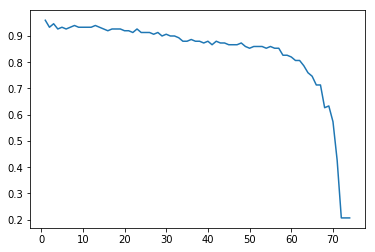

In [25]:
plt.plot(k,[s[1] for s in  gs.grid_scores_],)

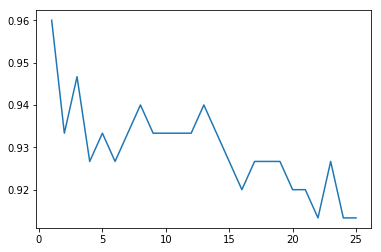

In [26]:
plt.plot(k[:25],[s[1] for s in  gs.grid_scores_][:25],)

### Which K would you chose and why?

Answer:

Somewhere between 1-5 has the highest peaks in accuracy. Eye-balling the graphs it looks like either 1 or 3 are the ideal values to choose. While k = 1 gives the highest accuracy, it may not be a particularly helpful value for new data.